<a href="https://www.kaggle.com/code/jamesgikas/nba-mvp-prediction-james-gikas?scriptVersionId=213280723" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I have always had a mutual intrest in both data analysis and basketball. In an era of the NBA where analytics are becoming more and more important, one topics that continues to remain relevant is the discourse over which player diseres to win MVP? Is it the player who puts up the best stats? The one who contributes the most to winning? Or is it the best player on the best team? In this project, I aim to use scikit-learn's linear regression models to analyze which factors from the years 1982-2021 were the most impactful in determining the MVP.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nba-player-season-statistics-with-mvp-win-share/NBA_Dataset.csv


First, we must import the dataset which will be using, which is a dataset containing NBA player stats from the 1982-2021 season.

In [2]:
data = pd.read_csv('/kaggle/input/nba-player-season-statistics-with-mvp-win-share/NBA_Dataset.csv')

In [3]:
data.fillna(0)

,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct
0,1982,Kareem Abdul-Jabbar,C,34,LAL,76,76,35.2,9.9,17.1,...,10.7,0.192,3.8,1.2,5.0,4.7,0.045,4.87,4.37,0.695
1,1982,Alvan Adams,C,27,PHO,79,75,30.3,6.4,13.0,...,7.2,0.144,1.4,2.2,3.6,3.4,0.000,3.45,3.05,0.561
2,1982,Mark Aguirre,SF,22,DAL,51,20,28.8,7.5,16.1,...,1.9,0.061,2.3,-1.6,0.7,1.0,0.000,-4.43,-4.48,0.341
3,1982,Danny Ainge,SG,22,BOS,53,1,10.6,1.5,4.2,...,0.5,0.042,-3.7,1.0,-2.7,-0.1,0.000,6.38,6.35,0.768
4,1982,Tiny Archibald,PG,33,BOS,68,51,31.9,4.5,9.6,...,5.2,0.115,1.4,-1.3,0.1,1.1,0.000,6.38,6.35,0.768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2022,Thaddeus Young,PF,33,TOT,52,1,16.3,2.7,5.2,...,2.2,0.126,0.1,2.1,2.2,0.9,0.000,0.00,0.00,0.500
17693,2022,Trae Young,PG,23,ATL,76,76,34.9,9.4,20.3,...,10.0,0.181,7.1,-2.0,5.2,4.8,0.000,1.56,1.55,0.524
17694,2022,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,2.1,0.145,-1.4,0.4,-1.0,0.2,0.000,4.45,4.23,0.646
17695,2022,Cody Zeller,C,29,POR,27,0,13.1,1.9,3.3,...,1.1,0.143,-1.2,-1.0,-2.1,0.0,0.000,-8.88,-8.55,0.329


Now we have a table of the stats of every single NBA player's individual season. We can create a True/False column titled "mvp" based on if the player recieved the highest amount of award shares (the percentage of MVP votes) in their season. 

In [4]:
#Adding MVP column based on the player (by season) with the most Award Shares (MVP vote percentage)
mvplist = data.loc[data.groupby('season')['award_share'].idxmax()]
mvplist["mvp"] = True
data = data.merge(mvplist[["season", "award_share", "mvp"]], on=["season", "award_share"], how="left")
data['mvp'] = data['mvp'].astype('boolean').fillna(False)


Let's begin to narrow down the list of players so that we can find our MVP winners. We can set up some very general guidelines that every MVP winner-or any solid NBA player for that matter should easily be able to meet. We will filter or list so that all player must have played more than thirty games that season, averaged more than twenty minutes in a game, and scored more than five points per game. After narrowing down our list, we can filter it by our MVP winners from 1982-2022.

In [5]:
#Narrowing Dataset by Setting Guidlines: (Very Simple Guidlies so we can not only see MVP winners in the dataset, but also all other notable NBA players in a season.)
    # - All MVPs must have played more than 20 games
    # - Must have averaged more than 10 minutes a game
    # - Scored more than 5 pts per game
data =  data[data["gs"] > 20]
data = data[data['mp_per_g'] > 10]
data = data[data['pts_per_g'] > 5]

data[data['mvp'] == True]


,season,player,pos,age,team_id,g,gs,mp_per_g,fg_per_g,fga_per_g,...,ws_per_48,obpm,dbpm,bpm,vorp,award_share,mov,mov_adj,win_loss_pct,mvp
186,1982,Moses Malone,C,26,HOU,81,81,42.0,11.7,22.5,...,0.218,6.2,-1.8,4.5,5.5,0.735,-0.04,-0.39,0.561,True
493,1983,Moses Malone,C,27,PHI,78,78,37.5,8.4,16.7,...,0.248,4.0,-0.3,3.7,4.2,0.960,7.67,7.53,0.793,True
647,1984,Larry Bird,PF,27,BOS,79,77,38.3,9.6,19.5,...,0.215,5.6,2.0,7.6,7.3,0.858,6.56,6.42,0.756,True
957,1985,Larry Bird,SF,28,BOS,80,77,39.5,11.5,22.0,...,0.238,6.8,2.0,8.8,8.7,0.978,6.65,6.47,0.768,True
1278,1986,Larry Bird,SF,29,BOS,82,81,38.0,9.7,19.6,...,0.244,6.6,2.1,8.7,8.4,0.981,9.41,9.06,0.817,True
1719,1987,Magic Johnson,PG,27,LAL,80,80,36.3,8.5,16.4,...,0.263,7.5,1.3,8.8,8.0,0.940,9.30,8.32,0.793,True
2067,1988,Michael Jordan,SG,24,CHI,82,82,40.4,13.0,24.4,...,0.308,8.8,4.2,13.0,12.5,0.831,3.40,3.76,0.610,True
2407,1989,Magic Johnson,PG,29,LAL,77,77,37.5,7.5,14.8,...,0.267,7.3,2.0,9.4,8.3,0.782,7.17,6.38,0.695,True
2767,1990,Magic Johnson,PG,30,LAL,79,79,37.2,6.9,14.4,...,0.270,8.3,1.8,10.1,8.9,0.691,6.78,6.74,0.768,True
3162,1991,Michael Jordan,SG,27,CHI,82,82,37.0,12.1,22.4,...,0.321,8.9,3.2,12.0,10.8,0.928,9.10,8.57,0.744,True


Now let's determaine which factors in our dataset are the most important in determaining the MVP. We can do this by creating a correlation matrix, which compares the strength of the correlation between two variables.By incorporating only the most relavant factors from our correlation matrix, we can come up with a better model to pick our MVP. 

We can start by converting the MVP column into a binary system, allowing us to compare it with any numerical values.  Additionally, let's remove any columns that we are confident should have zero effect on our results: such as the team they played for, their position, or the year they played in. 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import random 

#Getting rid of unecessary columns and turning the 'mvp' column into binary
mvpfactors = data.copy()
mvpfactors = pd.concat([mvpfactors, pd.get_dummies(mvpfactors['mvp'], prefix='Is_MVP')], axis=1)
mvpfactors.drop(columns=['mvp', 'season', 'Is_MVP_False', 'pos', 'team_id'], inplace=True)

We can also begin to visualise certain stats compared to award shares with matplotlib graphs. Here is a scatter plot of players from the 2022 season comparing their Value Over Replacement (VORP) to their award shares. Value over replacement is a metric aimed to show a player's offensive contributions to their team compared to a replacement-level player at the same position. As we can see, there is a strong relation. An MVP should bolster their team's offense by a considerable amount, much more so than a bench player, so VORP would be a notable factor to consider.

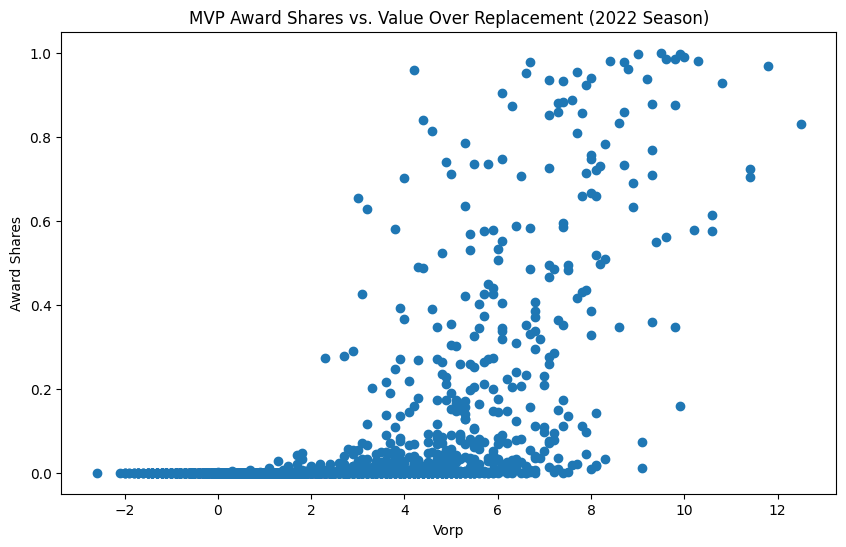

In [7]:
#Modeling different stats and their correlation to winning MVP
# - First, looking at Value Over Replacement (VORP) to Award Shares
plt.figure(figsize = (10,6))
plt.scatter(data['vorp'], data['award_share'])
plt.title('MVP Award Shares vs. Value Over Replacement (2022 Season)')
plt.xlabel('Vorp')
plt.ylabel('Award Shares')
plt.show()


We can also look at specific players stats in a Radar Chart to see how their individual stats compare. By looking at the stats of Nikola Jokic, the 2021, 2022, and 2024 NBA MVP winner, we can see how his assist percentage compares to his usage percentage or his field goal percentage. He clearly has a high usage percentage, but not very high steal or block percentages, highlighting how maybe those two stats will be less relevant in determaining an MVP. 

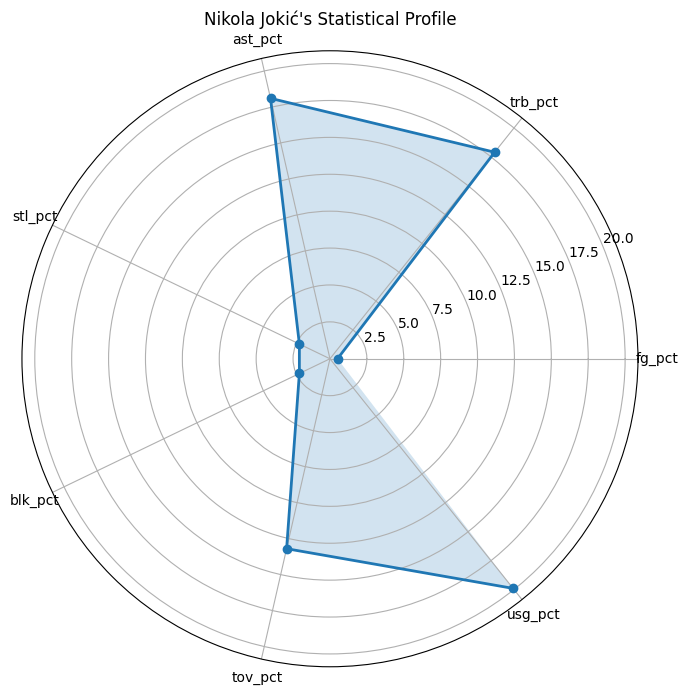

In [8]:
#Looking at a specific players stats in a Radar Chart, in this case, the MVP Nikola Jokic

player_name = 'Nikola Jokić'
mvp_data = mvpfactors[mvpfactors['player'] == player_name].iloc[0]
stats = ['fg_pct', 'trb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct']
values = [mvp_data[stat] for stat in stats]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
theta = np.linspace(0, 2 * np.pi, len(stats), endpoint=False)
ax.plot(theta, values, 'o-', linewidth=2)
ax.fill(theta, values, alpha=0.2)
ax.set_thetagrids(theta * 180 / np.pi, stats)
ax.set_title(f"{player_name}'s Statistical Profile")
plt.show()

To clearly visualise our correlation matrix, let's create a heatmap. From our total 46 varables, we can start by removing the bottom 26 from our model until we are left with twenty. The bottom twenty-six varaibles have such a weak correlation to MVP outcomes that any difference they make is negligible. 

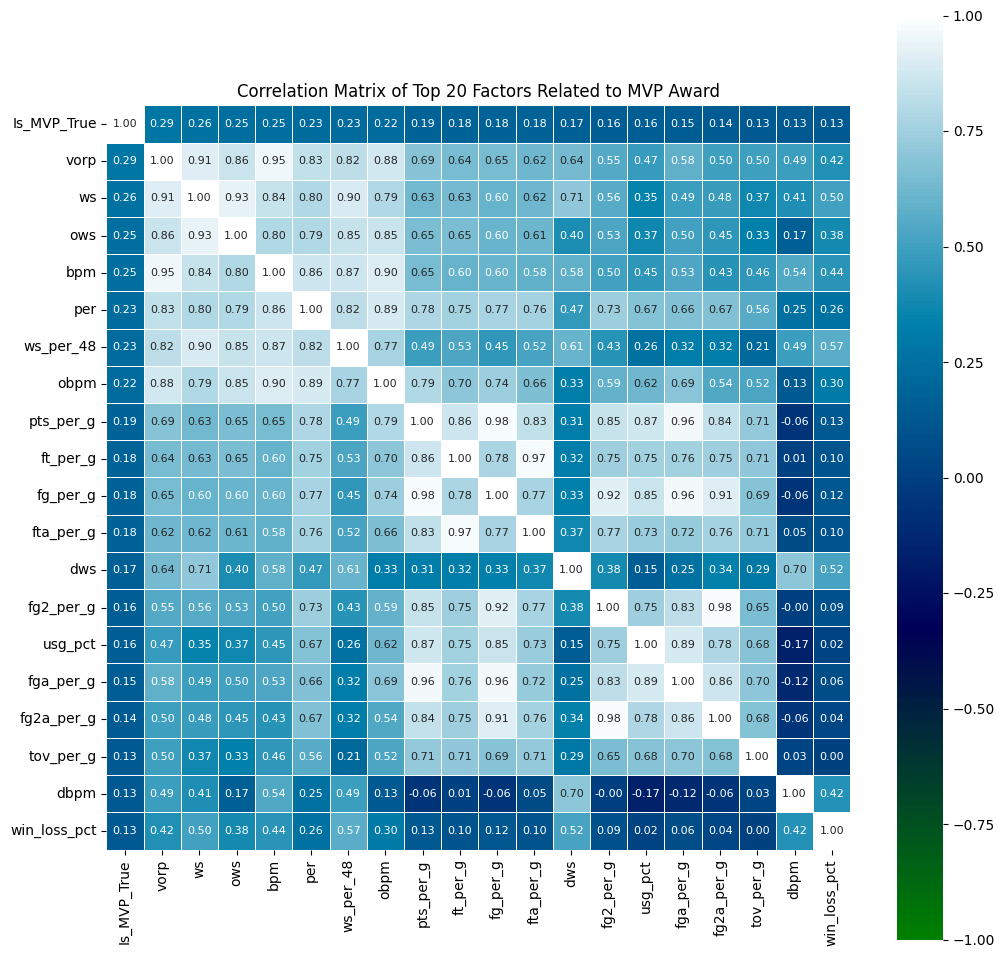

In [9]:
# Assuming mvpfactors DataFrame is already defined and processed
mvpfactors = mvpfactors.drop(columns=['award_share', 'player'])
corr_matrix = mvpfactors.corr()

# Get the top 20 factors correlated with the MVP variable
top_factors = corr_matrix['Is_MVP_True'].abs().sort_values(ascending=False).head(20).index

# Create a new correlation matrix for the top 20 factors
sorted_corr_matrix = corr_matrix.loc[top_factors, top_factors]

# Seaborn Heatmap of the Top 20 Correlation Matrix
fig, ax = plt.subplots(figsize=(12, 12))  # Adjust size for clarity
sns.heatmap(
    sorted_corr_matrix,
    vmin=-1, vmax=1,
    cmap="ocean",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"fontsize": 8},
    linewidths=0.5,
    linecolor="white",
    cbar=True,
    cbar_kws={"orientation": "vertical"},
    square=True,
    xticklabels=True,
    yticklabels=True,
    ax=ax
)
plt.title("Correlation Matrix of Top 20 Factors Related to MVP Award")
plt.show()

We can see that the factors that have the highest correlation to determaining MVP are VORP, win-shares and offensive win-shares, aswell as box plus-minus. These all make sense as the MVP is the player who should make the biggest impact on the succsess and winning of their team. 

You may be wondering: Why are the correlation values to the MVP so low? Since our data incorporates thousands of NBA player stats, not just those who have won MVP, there may not be a completely perfect correlation to winning MVP. There are many players who have put up good stats, had high win shares, or a high VORP that have not won the award, which can just be attributed the nature of the award in the first place. Only one player can win every year. 

In [10]:
#Predictors we will use for our model
predictors = sorted_corr_matrix.index[:21]
predictors = predictors[predictors != 'Is_MVP_True']
predictors


Index(['vorp', 'ws', 'ows', 'bpm', 'per', 'ws_per_48', 'obpm', 'pts_per_g',
       'ft_per_g', 'fg_per_g', 'fta_per_g', 'dws', 'fg2_per_g', 'usg_pct',
       'fga_per_g', 'fg2a_per_g', 'tov_per_g', 'dbpm', 'win_loss_pct'],
      dtype='object')

Now, we have the twenty factors we will use in our model to predict our MVP.

Our first model will be a Ridge regression model using a train/test split. We will use all of the stats from before the 2022 season, and use it to predict the award shares for the 2022 season. Based on our results, in addition to the rank the player placed in the MVP race (based on their award shares), we can also create a column for what the model predicts they will rank. 

In [11]:
#Adding Season, Player, and Award Share data back for the purpose of training
mvpfactors = mvpfactors.assign(Player=data['player'], Award_Shares=data['award_share'], Season=data['season'])

#The data will be trained on the data from NBA seasons 1982-2021 and will predict the 2022 MVP voting
train = mvpfactors[mvpfactors["Season"] < 2022]
test = mvpfactors[mvpfactors["Season"] == 2022]

#Trying Ridge Regression (Train/Test Split)
from sklearn.linear_model import Ridge

reg = Ridge(alpha=0.1)
reg.fit(train[predictors], train["Award_Shares"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
combination = pd.concat([test[["Player","Award_Shares"]], predictions], axis=1)

#Adding a column for the actual results of 2022 MVP voting
combination = combination.sort_values("Award_Shares", ascending=False)
combination["Rk"] = list(range(1, combination.shape[0] + 1))

#Adding a column for the predicted results of the MVP voting
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))

combination = combination.sort_values("Award_Shares", ascending=False)
combination.head(40)

,Player,Award_Shares,predictions,Rk,Predicted_Rk
17381,Nikola Jokić,0.875,0.294419,1,1
17253,Joel Embiid,0.706,0.185628,2,3
17103,Giannis Antetokounmpo,0.595,0.231374,3,2
17150,Devin Booker,0.216,0.079830,4,13
17232,Luka Dončić,0.146,0.162297,5,4
17617,Jayson Tatum,0.043,0.130731,6,5
17481,Ja Morant,0.010,0.072871,7,17
17217,Stephen Curry,0.004,0.079949,8,12
17529,Chris Paul,0.002,0.057570,9,22
17225,DeMar DeRozan,0.001,0.087631,11,10


Nikola Jokic was the 2022 MVP, and based on our model, he is well deserving of the award. However, there are some noticeable differences between the model and the actual MVP finishes. Giannis Antetokounmpo and Joel Embiid swapped places between their predicted and actual rankings. Devin Booker dropped from fourth to seventeenth in our model, while Lebron James and Kevin Durant jump from twelth and tenth to seventh and ninth respectively.

Next we can look at some linear regression models to see how accurate our model is. One commonly used model is the Mean Squared Error, which will calculate the average sqaured difference between the actual rankings and the predicted rankings. This model is effective in eliminating outliers, and the lower the Mean Sqaured Error, the more accurate our Ridge model is.

In [12]:
#Mean Squared Error to test how accurate our model is, a lower score is preferable
from sklearn.metrics import mean_squared_error
mean_squared_error(combination["Award_Shares"], combination["predictions"])

0.004953966787615027

Our Mean Squared Error is around 0.004. We can also find the average precision of our predicted rankings based on how far they were from the actual rankings. In this case, a score of one indicates that the predicted and actual rankings were identical. 

In [13]:
#Average prescion of the predicted rankings (how far off they were from the actual ranking)
# - The closer the score is to one, the more accurate it is
def find_ap(combination):
    
    # Sort the actual and predicted rankings
    actual = combination.sort_values("Award_Shares", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)

    # Calculate the average precision
    ps = []
    found = 0
    seen = 1
    for _, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    if not ps:
        return 0.0
    else:
        return sum(ps) / len(ps)
    
find_ap(combination)

0.876923076923077

Additonally, we can also backtest our model by looking at predictions from five past years, in this case from 1991-1995. As we can see, although our model became slightly less acurrate, going from 0.87 to 0.75, it is still a fairly strong method to pick an MVP. We can also infer from this that although our model is not as good in predicting the MVP in the 90s, it may be more suited to account for modern MVP voter standards in the NBA.

In [14]:
#Testing to see how accurate the model is after using predictions from 5 years (1991-1995)

years = list(range(1991,2022))
aps = []
all_predictions = []
for year in years[5:]:
    train = mvpfactors[mvpfactors["Season"] < year]
    test = mvpfactors[mvpfactors["Season"] == year]
    reg.fit(train[predictors],train["Award_Shares"])
    predictions = reg.predict(test[predictors])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Award_Shares"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

sum(aps) / len(aps)

0.7592307699264714

What if we wanted to see the greatest disparities amongst predicted vs actual MVP ranks? Which players finished high in the MVP voting, while the model was less favourable towards? We can start by creating a new column which is equal to the actual rank minus the predicted rank. 

In [15]:
#Find differences between MVP voting rank and predicted rank
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Award_Shares", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions
add_ranks(all_predictions[1])

,Player,Award_Shares,predictions,Predicted_Rk,Rk,Diff
5617,Karl Malone,0.857,0.277458,2,1,-1
5581,Michael Jordan,0.832,0.282211,1,2,1
5557,Grant Hill,0.327,0.274372,3,3,0
5545,Tim Hardaway,0.207,0.169452,5,4,-1
5707,Glen Rice,0.117,0.036364,40,5,-35
...,...,...,...,...,...,...
5495,Joe Dumars,0.000,0.006951,70,168,98
5521,Dean Garrett,0.000,0.006400,71,169,98
5729,Bryon Russell,0.000,0.004860,72,170,98
5565,Lindsey Hunter,0.000,0.004835,73,171,98


Expanding on our previous backtest model, what if we could see the accuracy of our MVP predictor for all years spanning 1982-2022? If it begins to drop significantly, then we may begin to make adjustments.

In [16]:
#Backtest model for all years
def backtest(mvpfactors, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = mvpfactors[mvpfactors["Season"] < year]
        test = mvpfactors[mvpfactors["Season"] == year]
        model.fit(train[predictors],train["Award_Shares"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Award_Shares"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)


In [17]:
#mean_ap for backtest model
mean_ap, aps, all_predictions = backtest(mvpfactors, reg, years[5:], predictors)
mean_ap

0.7592307699264714

Our mean average precision was around 0.759, which is very similar to the mean ap for our 1991-1995 backtest model.

To see how our model hindered some players for their predicted MVP ranking, we can sort our column based on which players amongst top five finishers had the greatest disparity between the two rankings. Steve Nash appears twice on this list, aswell as other 2000s players such as Peja Stojaković, Jason Kidd, and Allen Iverson.

In [18]:
#Sorting by the greatest difference between predicted rank and actual rank in top 5 MVP finishers
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Award_Shares,predictions,Predicted_Rk,Rk,Diff
9201,Steve Nash,0.839,0.043942,37,1,-36
9658,Steve Nash,0.739,0.058117,32,1,-31
8832,Peja Stojaković,0.228,0.070638,21,4,-17
10116,Steve Nash,0.785,0.074812,18,2,-16
16697,Joel Embiid,0.580,0.054572,15,2,-13
7807,Jason Kidd,0.712,0.104661,14,2,-12
12563,Carmelo Anthony,0.393,0.079759,13,3,-10
6114,Shaquille O'Neal,0.268,0.087655,13,4,-9
8753,Jermaine O'Neal,0.425,0.099924,11,3,-8
6447,Allen Iverson,0.270,0.029571,11,4,-7


Finally for our Ridge Regression Model, we can see which values it cared most about when creating the predicted rankings. Win shares per 48 minutes stands out as being especially important by a considerably wide margin, while VORP and win-loss percentage are our runner-ups. 

In [19]:
#Figuring out which stats the Ridge Regression Model cares the most about
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)

,0,1
5,0.661652,ws_per_48
0,0.087867,vorp
18,0.026245,win_loss_pct
12,0.025239,fg2_per_g
10,0.010784,fta_per_g
13,0.005925,usg_pct
7,0.004366,pts_per_g
2,-0.001482,ows
4,-0.001595,per
16,-0.001765,tov_per_g


Next, we can try a different model, this time a Random Forest Regressor to see how it compares. A Random Forest Regressor works by having the algorithim create multiple decision trees (rather than a singular one), each trained on a different subset of the data. It aims to minimize the mean squared error. 

In [20]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

rftrain = mvpfactors[mvpfactors['Season'] < 2022]
rftest = mvpfactors[mvpfactors['Season'] == 2022]

rf.fit(rftrain[predictors], rftrain["Award_Shares"])
rfpredictions = rf.predict(rftest[predictors])
rfpredictions = pd.DataFrame(rfpredictions, columns=["rfpredictions"], index=rftest.index)
rfcombination = pd.concat([rftest[["Player", "Award_Shares"]], rfpredictions], axis=1)

rfcombination = rfcombination.sort_values("Award_Shares", ascending=False)
rfcombination["Actual_Rank"] = list(range(1, rfcombination.shape[0] + 1))
rfcombination = rfcombination.sort_values("rfpredictions", ascending=False)
rfcombination["Predicted_Rank"] = list(range(1, rfcombination.shape[0] + 1))
rfcombination = rfcombination.sort_values("Award_Shares", ascending=False)
rfcombination.head(40)

,Player,Award_Shares,rfpredictions,Actual_Rank,Predicted_Rank
17381,Nikola Jokić,0.875,0.595726,1,1
17253,Joel Embiid,0.706,0.386611,2,3
17103,Giannis Antetokounmpo,0.595,0.482895,3,2
17150,Devin Booker,0.216,0.089077,4,8
17232,Luka Dončić,0.146,0.286696,5,4
17617,Jayson Tatum,0.043,0.074162,6,9
17481,Ja Morant,0.010,0.204768,7,5
17217,Stephen Curry,0.004,0.016378,8,16
17529,Chris Paul,0.002,0.009263,9,20
17365,LeBron James,0.001,0.112234,12,6


Next, we can try a different model, this time a Random Forest Regressor to see how it compares. A Random Forest Regressor works by having the algorithim create multiple decision trees (rather than a singular one), each trained on a different subset of the data. It aims to minimize the mean squared error. 

In [21]:
#Mean Squared Error for Random Forest Regession
mean_squared_error(rfcombination["Award_Shares"], rfcombination["rfpredictions"])

0.0015574997776201462


It is around 0.0015, remarkably smaller than the Ridge model's mse of 0.004. Furthermore, why don't we backtest this model to find its mean average precision.

In [22]:
#Backtesting the Random Forest Regressor
mean_ap, aps, all_predictions = backtest(mvpfactors, rf, years[28:], predictors)
mean_ap

0.8652380952380953

In summary, although both models showed similar results, by backtesting both of them, we find than the Random Forest Regressor not only had a lower mean squared error, but also a higher mean average precision. It is important to understand the applications of both of these regression models, as they may be more useful in certain scenarios. 